In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Baseline Classification Pipeline

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv("./data/ECG/ECG200_TRAIN.txt", sep='\s+', header=None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,-1.0,0.502055,0.542163,0.722383,1.428885,2.136516,2.281149,1.936274,1.468890,1.008845,...,0.931043,0.610298,0.638894,0.684679,0.583238,0.640522,0.708585,0.705011,0.713815,0.433765
1,1.0,0.147647,0.804668,0.367771,0.243894,0.026614,-0.274402,0.096731,-0.747731,-1.609777,...,-0.533503,-0.400228,0.176084,1.111768,2.438428,2.734889,1.736054,0.036857,-1.265074,-0.208024
2,-1.0,0.316646,0.243199,0.370471,1.063738,1.678187,1.759558,1.697717,1.612159,1.168188,...,0.764229,0.610621,0.552900,0.566786,0.604002,0.777068,0.812345,0.748848,0.818042,0.539347
3,-1.0,1.168874,2.075901,1.760140,1.606446,1.949046,1.302842,0.459332,0.516412,0.852180,...,0.419006,0.723888,1.323947,2.136488,1.746597,1.470220,1.893512,1.256949,0.800407,0.731540
4,1.0,0.648658,0.752026,2.636231,3.455716,2.118157,0.520620,-0.188627,0.780818,0.933775,...,-0.097869,-0.136787,-0.340237,-0.089441,-0.080297,-0.192584,-0.304704,-0.454556,0.314590,0.582190


In [8]:
set(df[0])

{-1.0, 1.0}

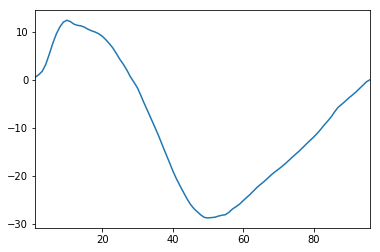

In [13]:
df.iloc[0,1:].cumsum().plot()

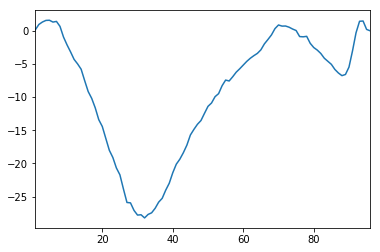

In [12]:
df.iloc[1,1:].cumsum().plot()

#### Goal: Build a classification model (labels are in column 0) against all features.


## Steps

1. Smoothen / filter / denoising ==> Get rid of randomly looking peaks.
    - Moving average. 
    - Percent change. 
    - Exponential smoothing.
    - Cumsum (basically the integral).
    - **Savitzky-Golay filter** ==> Approximating by polynomials in a small window.
    - **Fourier transform** ==> Series that look a little bit periodic.
    
2. Feature selection: Choose some features, either manually or algorithmically.
    - peakfinder functions: find local (within a given window) maxima/minima.
    - select features using a black-box optimization algorithm.
    - Backward/forward feature selection.
3. Create model by "normal" machine learning methods.


In [14]:
df.shape

(100, 97)

# Baseline exampe

In [20]:
X = np.array([df.iloc[col,1:].cumsum().values for col in range(df.shape[0])])

In [21]:
y = df.iloc[:,0].values

In [22]:
from sklearn.feature_selection import SelectKBest # Replace by some peakfinder/blackbox method
# Other estimators can work well => decision trees / RF usually bad choices in this case
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import make_pipeline

In [23]:
sel = SelectKBest(k=10)
clf = LogisticRegression()
pipe = make_pipeline(sel, clf)

In [24]:
pipe.fit(X,y)

Pipeline(memory=None,
     steps=[('selectkbest', SelectKBest(k=10, score_func=<function f_classif at 0x000001BF88066C80>)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [25]:
from sklearn.decomposition import PCA
pca = PCA()

In [30]:
X_pca = pca.fit_transform(df.iloc[:,1:].values)

(array([92.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([1.12414403e-19, 4.08386572e-02, 8.16773144e-02, 1.22515972e-01,
        1.63354629e-01, 2.04193286e-01, 2.45031943e-01, 2.85870600e-01,
        3.26709257e-01, 3.67547915e-01, 4.08386572e-01]),
 <a list of 10 Patch objects>)

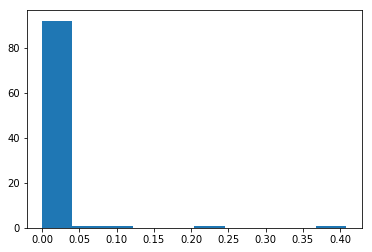

In [31]:
plt.hist(pca.explained_variance_ratio_)

### Preprocessing methods

#### Savitzky-Golay filter

In [32]:
from scipy.signal import savgol_filter

In [33]:
normal = df.iloc[1,1:].values

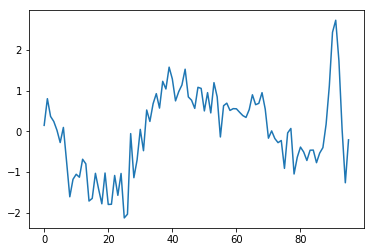

In [34]:
plt.plot(normal)

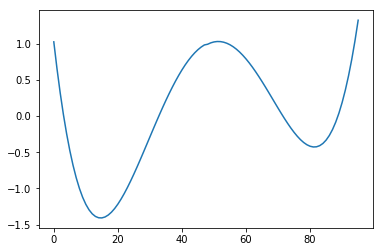

In [40]:
normal_smooth = savgol_filter(normal, window_length=95, polyorder=4)
plt.plot(normal_smooth)

#### Fourier Transform

c:\users\hp\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


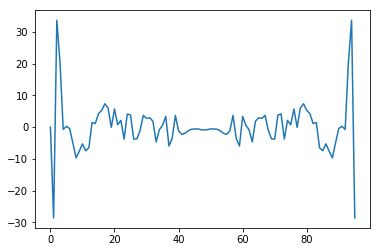

In [41]:
from scipy.fftpack import fft
fft_vals = fft(normal)
vals = range(len(fft_vals))
plt.plot(vals, fft_vals)

c:\users\hp\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


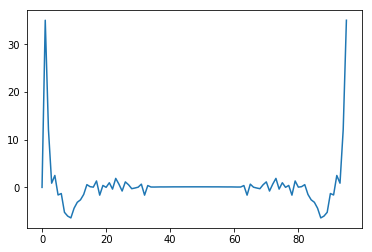

In [42]:
event = df.iloc[0,1:].values
fft_vals = fft(event)
vals = range(len(fft_vals))
plt.plot(vals, fft_vals)

#### Power Spectral Density

c:\users\hp\anaconda3\lib\site-packages\scipy\signal\spectral.py:1785: UserWarning: nperseg = 256 is greater than input length  = 96, using nperseg = 96
  .format(nperseg, input_length))


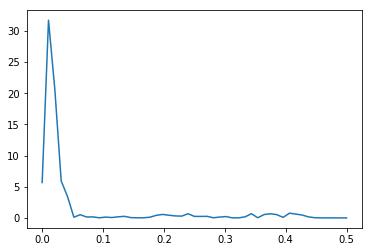

In [43]:
from scipy.signal import welch
vals, psd = welch(normal)
plt.plot(vals, psd)

## TO DO:
- Look at dependence of number of features vs accuracy.
- Look at feature importance against two representatives of each class.

In [44]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,-1.0,0.502055,0.542163,0.722383,1.428885,2.136516,2.281149,1.936274,1.468890,1.008845,...,0.931043,0.610298,0.638894,0.684679,0.583238,0.640522,0.708585,0.705011,0.713815,0.433765
1,1.0,0.147647,0.804668,0.367771,0.243894,0.026614,-0.274402,0.096731,-0.747731,-1.609777,...,-0.533503,-0.400228,0.176084,1.111768,2.438428,2.734889,1.736054,0.036857,-1.265074,-0.208024
2,-1.0,0.316646,0.243199,0.370471,1.063738,1.678187,1.759558,1.697717,1.612159,1.168188,...,0.764229,0.610621,0.552900,0.566786,0.604002,0.777068,0.812345,0.748848,0.818042,0.539347
3,-1.0,1.168874,2.075901,1.760140,1.606446,1.949046,1.302842,0.459332,0.516412,0.852180,...,0.419006,0.723888,1.323947,2.136488,1.746597,1.470220,1.893512,1.256949,0.800407,0.731540
4,1.0,0.648658,0.752026,2.636231,3.455716,2.118157,0.520620,-0.188627,0.780818,0.933775,...,-0.097869,-0.136787,-0.340237,-0.089441,-0.080297,-0.192584,-0.304704,-0.454556,0.314590,0.582190


In [46]:
df.apply(lambda row: savgol_filter(row[1:],5,2), axis=0)

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,0.657143,0.054033,0.599664,0.109115,-0.030429,0.110031,0.064021,0.390102,-0.458994,-1.294828,...,-0.265680,-0.216165,0.252602,0.973740,2.211830,2.569928,1.625383,0.199844,-0.993949,-0.162361
1,-0.428571,0.609714,0.954922,0.928269,1.415363,1.453894,1.051174,0.980112,0.809879,0.410501,...,0.219770,0.308940,0.614001,1.190854,1.378100,1.385798,1.349082,0.611583,0.257328,0.449000
2,-0.657143,0.851353,1.170755,1.638687,2.197508,2.121422,1.397452,0.851921,1.190833,1.235546,...,0.445444,0.524553,0.681537,1.092453,0.783893,0.633795,0.947332,0.690818,0.855795,0.728604
3,0.657143,0.724157,1.321154,2.504746,2.348834,1.816177,0.516235,-0.689219,0.131075,0.777536,...,0.121352,0.176263,0.276856,0.658945,0.600944,0.485751,0.397889,0.186017,0.430949,0.584120
4,0.657143,0.680659,1.304494,2.669394,2.405077,1.966358,0.868622,-0.406618,0.083413,0.499461,...,0.232925,0.174515,0.022713,0.013794,0.207235,0.230431,-0.187257,-0.057350,0.362866,0.374391
5,-0.657143,0.845451,1.634567,2.179613,2.140352,2.472308,2.080280,1.004182,0.478309,0.255247,...,0.493984,0.552942,0.443682,0.232612,0.418049,0.504785,0.170618,0.323126,0.429681,0.178109
6,-0.657143,0.638499,1.291321,2.116085,2.603639,2.672286,1.780094,0.788397,0.489209,-0.015070,...,0.310193,0.460903,0.266027,0.137233,0.190401,0.184858,0.111687,0.185418,0.367848,0.149137
7,0.485714,0.791766,1.682301,2.368371,2.246453,1.544360,0.612439,0.149796,0.401449,0.607059,...,0.018794,0.173650,0.030639,0.025954,-0.010911,-0.055887,-0.041751,-0.061599,0.168476,0.157766
8,1.171429,1.013233,2.001266,2.385066,2.218601,1.353466,0.512739,0.313913,0.351037,0.579477,...,-0.150729,-0.046469,-0.097996,-0.087198,-0.038883,-0.005032,-0.031711,-0.122063,0.114685,0.171859
9,1.000000,0.932834,1.536416,1.638211,2.172193,2.088146,2.056668,2.005255,1.214879,0.748668,...,0.088113,0.095658,0.076021,-0.085892,-0.091461,-0.069416,-0.158112,-0.163556,0.146339,0.215934


In [ ]:
df.bfill()